# Analysis Ford GoBike System Data Feb-2019

##  By Wael Abd Elhady Tohamy


## Investigation Overview

> Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is 'the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. (https://en.wikipedia.org/wiki/Bay_Wheels)

## Dataset Overview

> The dataset used for this exploratory analysis consists of individual trips data in Feb 2019 in CSV format, Visualizations below are created from wrangled and cleaned data to facilitate exploration analysis and help discover usage pattern and rider characteristics.


In [1]:
# import all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df=pd.read_csv('Cleaned.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,duration_hour,start_date,start_hourofday,start_dayofweek,start_month,member_age
0,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,26.416667,0.440278,2019-02-28,23,Thursday,February,45.0
1,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,29.883333,0.498056,2019-02-28,23,Thursday,February,60.0
2,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,312.0,San Jose Diridon Station,3803,Subscriber,1983.0,Female,No,19.116667,0.318611,2019-02-28,23,Thursday,February,36.0
3,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6329,Subscriber,1989.0,Male,No,26.916667,0.448611,2019-02-28,23,Thursday,February,30.0
4,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6548,Subscriber,1988.0,Other,No,26.166667,0.436111,2019-02-28,23,Thursday,February,31.0


## Univariate Exploration

>- Explore the trips distribution over hour-of-day, day-of-week and month
>- Explore riders User-type, member_gender, bike_share_for_all_trip and member_age.
>- Explore Trip duration duration_minute.

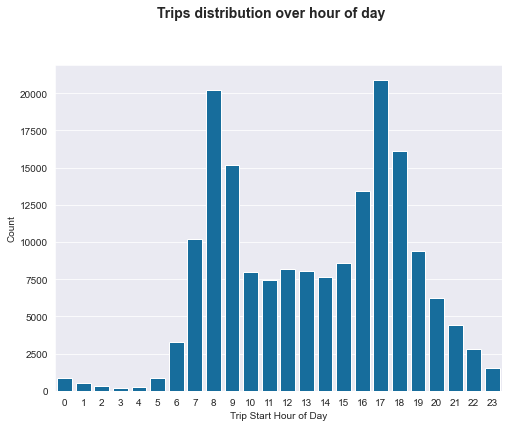

In [3]:
# trip distribution over hour of day 

plt.rcParams['figure.figsize'] = 8, 6
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data=df, x='start_hourofday', color=base_color);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');
plt.suptitle('Trips distribution over hour of day', fontsize=14, fontweight='semibold', y=1.015);

It is quite Observed that the majority of rides happened in hours around two timeframes, 7am-9am and 16pm-18pm

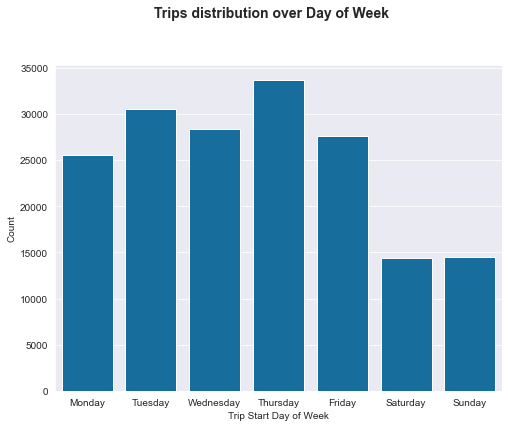

In [4]:
# trip distribution over Day of Week

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_dayofweek'] = df['start_dayofweek'].astype(weekdaycat)

sb.countplot(data=df, x='start_dayofweek', color=base_color);
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');
plt.suptitle('Trips distribution over Day of Week', fontsize=14, fontweight='semibold', y=1.015);

It is quite Observed that the majority of rides happened on work days (Tuesday-Tursday) 
and miniorty od rides happened on Weekend days (Saturday and Sunday)

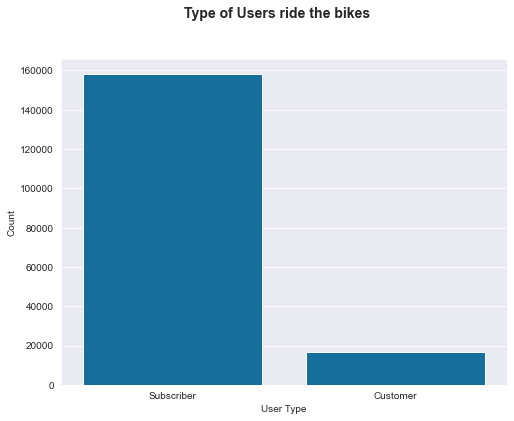

In [5]:
# Type of Users ride the bikes

sb.countplot(data=df, x='user_type', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Count');
plt.suptitle('Type of Users ride the bikes', fontsize=14, fontweight='semibold', y=1);

It is Observed that the majority riders is Subscribers

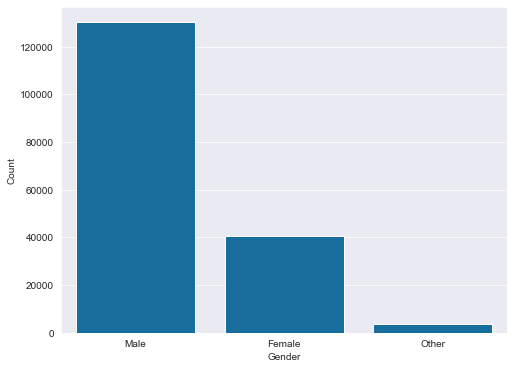

In [6]:
# Gender of Users ride the bikes

sb.countplot(data=df, x='member_gender', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Count');

It is Observed that the majority riders is Male

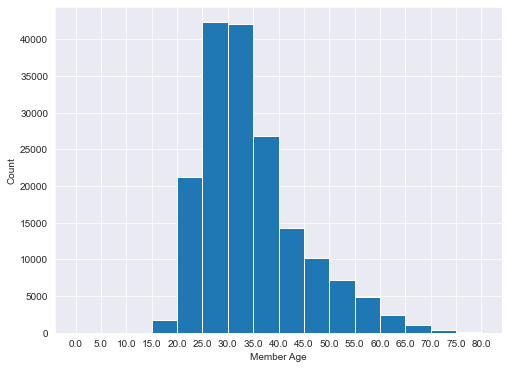

In [7]:
# Age of Users ride the bikes

bins = np.arange(0, df['member_age'].max()+5, 5)
plt.hist(data=df, x='member_age', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Member Age');
plt.ylabel('Count');

It is Observed that the majority riders age is between 25 year to 35 year

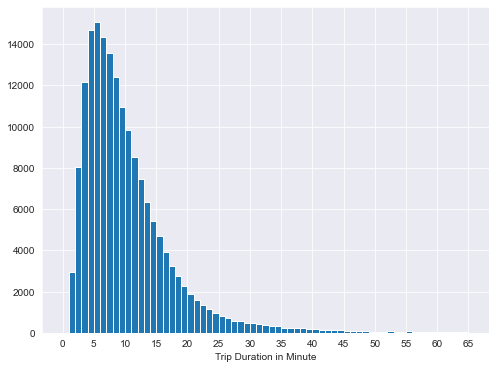

In [8]:
# Explore the trip duration 

bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 5)
plt.hist(data=df, x='duration_minute', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

It is Observed that the majority Duration between 5 to 10 minutes

**Observations from Univariate Exploration:**

>- the majority of rides happened in hours around two timeframes, 7am-9am and 16pm-18pm
>- the majority of rides happened on work days (Tuesday-Tursday) and miniorty od rides happened on Weekend days (Saturday and Sunday).
>- the majority riders is Subscribers
>- the majority riders is Male
>- the majority riders age is between 25 year to 35 year
>- the majority trips duration between 5 to 10 minutes

## Bivariate Exploration

>- How does the trip duration distribution vary between customers and subscribers?
>- How does the trip duration distribution vary between members gender?
>- How does the trip duration distribution vary between Days of Week?
>- How does riders' member age vary between Days of Week?
>- How does riders' member age vary between between customers and subscribers?

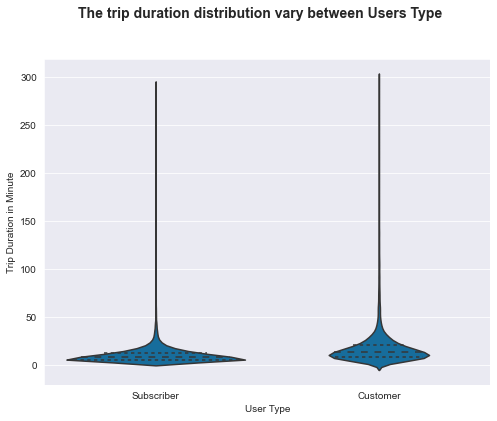

In [9]:
# How does the trip duration distribution vary between customers and subscribers?

sb.violinplot(data=df, x='user_type', y='duration_minute', color=base_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');
plt.suptitle('The trip duration distribution vary between Users Type', fontsize=14, fontweight='semibold', y=1);

Subscriber user is the shortest Duration

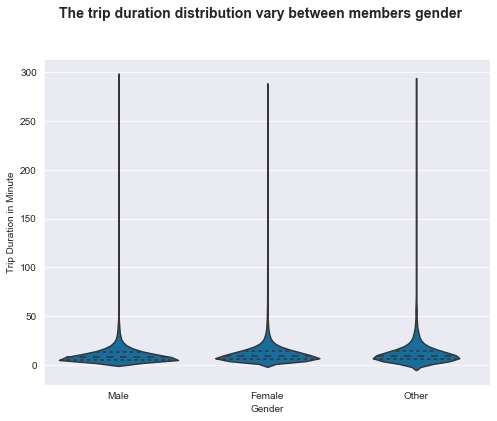

In [10]:
#How does the trip duration distribution vary between members gender?

sb.violinplot(data=df, x='member_gender', y='duration_minute', color=base_color, inner='quartile');
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute');
plt.suptitle('The trip duration distribution vary between members gender', fontsize=14, fontweight='semibold', y=1);

Male members is the shortest Duration

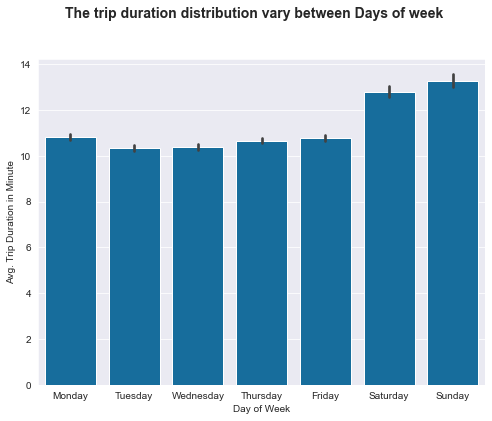

In [11]:
# How does the trip duration distribution vary between Days of Week?

sb.barplot(data=df, x='start_dayofweek', y='duration_minute', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.suptitle('The trip duration distribution vary between Days of week', fontsize=14, fontweight='semibold', y=1);

Saturday and Sunday is the longest Duration

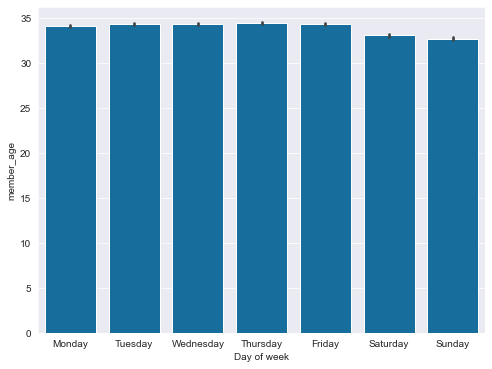

In [12]:
# How does riders' member age vary between Days of Week?

sb.barplot(data=df, x='start_dayofweek', y='member_age', color=base_color);
plt.xlabel('Day of week');
plt.ylabel('member_age');

the riders who used the bicks in saturday and sunday is more youngest

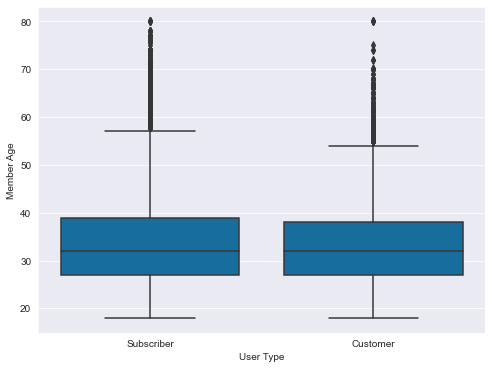

In [13]:
# How does riders' member age vary between between customers and subscribers?

sb.boxplot(data=df, x='user_type', y='member_age', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Member Age');

Customer riders is the youngest

**Observations from Bivariate Exploration:**

>- Subscriber user is the shortest Duration
>- Male members is the shortest Duration
>- Saturday and Sunday is the longest Duration
>- the riders who used the bicks in saturday and sunday is more youngest
>-Customer riders is the youngest

## Multivariate Exploration

>- How does the average trip duration vary in weekdays between customers and subscribers?
>- How does riders member gender vary in weekdays between customers and subscribers?

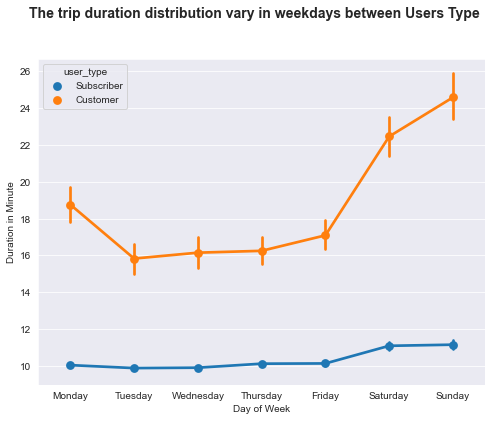

In [14]:
# How does the average trip duration vary in weekdays between customers and subscribers?

sb.pointplot(data=df, x='start_dayofweek', y='duration_minute', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Duration in Minute');
plt.suptitle('The trip duration distribution vary in weekdays between Users Type', fontsize=14, fontweight='semibold', y=1);

The subscribers ride much shorter trips compared to customers 

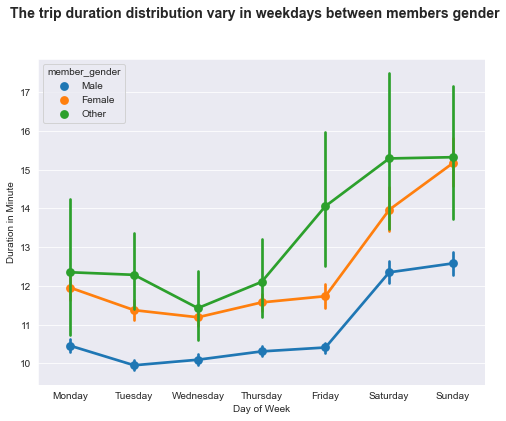

In [15]:
# How does riders member gender vary in weekdays between customers and subscribers?

sb.pointplot(data=df, x='start_dayofweek', y='duration_minute', hue='member_gender');
plt.xlabel('Day of Week');
plt.ylabel('Duration in Minute');
plt.suptitle('The trip duration distribution vary in weekdays between members gender', fontsize=14, fontweight='semibold', y=1);

Male riders are the shortest trips

**Observations from Multivariate Exploration:**

>- The subscribers ride much shorter trips duration compared to customers Over all days of week
>- Male riders are the shortest trip duration Over all days of week

In [ ]:
 !jupyter nbconvert slide_deck.ipynb --to slides --post serve  --no-input